# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [4]:
cities

['carnarvon',
 'albany',
 'kapaa',
 'asau',
 'conway',
 'linguere',
 'taburao',
 'yellowknife',
 'hobart',
 'tasiilaq',
 'bolungarvik',
 'jamestown',
 'great falls',
 'mirabad',
 'dikson',
 'port elizabeth',
 'hauterive',
 'maitum',
 'vila velha',
 'barentsburg',
 'muscat',
 'waipawa',
 'mataura',
 'richards bay',
 'upernavik',
 'victoria',
 'ushuaia',
 'otavi',
 'barrow',
 'hermanus',
 'lorengau',
 'busselton',
 'tautira',
 'kumta',
 'punta arenas',
 'port alfred',
 'karakendzha',
 'beloha',
 'castro',
 'alotau',
 'wa',
 'newport',
 'bargal',
 'tiksi',
 'provideniya',
 'lagoa',
 'sicamous',
 'komsomolskiy',
 'grand-lahou',
 'talnakh',
 'chokurdakh',
 'darhan',
 'sibolga',
 'belushya guba',
 'tura',
 'hambantota',
 'rudsar',
 'mehamn',
 'humberto de campos',
 'labutta',
 'vestmannaeyjar',
 'aklavik',
 'mys shmidta',
 'floha',
 'marcona',
 'kruisfontein',
 'saint-philippe',
 'auki',
 'bakel',
 'vitim',
 'fortuna',
 'okhotsk',
 'cape town',
 'ashtabula',
 'kintampo',
 'plymouth',
 'san s

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# set up lists to hold reponse info
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
country = []
dt = []
cities_found = []

# Loop through the list of cities and perform a request for data on each
print('Beginning Data Retrieval\n-----------------------------')
for city in cities:
    print(f'Processing Record {cities.index(city)+1} | {city}')
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        cities_found.append(city)
    except:
        print('City not found. Skipping...')
        
print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | carnarvon
Processing Record 2 | albany
Processing Record 3 | kapaa
Processing Record 4 | asau
Processing Record 5 | conway
Processing Record 6 | linguere
Processing Record 7 | taburao
City not found. Skipping...
Processing Record 8 | yellowknife
Processing Record 9 | hobart
Processing Record 10 | tasiilaq
Processing Record 11 | bolungarvik
City not found. Skipping...
Processing Record 12 | jamestown
Processing Record 13 | great falls
Processing Record 14 | mirabad
Processing Record 15 | dikson
Processing Record 16 | port elizabeth
Processing Record 17 | hauterive
Processing Record 18 | maitum
Processing Record 19 | vila velha
Processing Record 20 | barentsburg
City not found. Skipping...
Processing Record 21 | muscat
Processing Record 22 | waipawa
Processing Record 23 | mataura
Processing Record 24 | richards bay
Processing Record 25 | upernavik
Processing Record 26 | victoria
Processing Record 27 | ushuaia
Pr

Processing Record 227 | ende
Processing Record 228 | nikolskoye
Processing Record 229 | pisco
Processing Record 230 | sambava
Processing Record 231 | guerrero negro
Processing Record 232 | bengkulu
Processing Record 233 | sumenep
Processing Record 234 | yumen
Processing Record 235 | airai
Processing Record 236 | santa rosa
Processing Record 237 | bhaktapur
Processing Record 238 | port hardy
Processing Record 239 | deputatskiy
Processing Record 240 | cherskiy
Processing Record 241 | chernyshevskiy
Processing Record 242 | tiberias
Processing Record 243 | kenora
Processing Record 244 | juba
Processing Record 245 | mouzakion
City not found. Skipping...
Processing Record 246 | namibe
Processing Record 247 | parry sound
Processing Record 248 | la palma
Processing Record 249 | kirakira
Processing Record 250 | college
Processing Record 251 | saint george
Processing Record 252 | campina verde
Processing Record 253 | sola
Processing Record 254 | pucara
Processing Record 255 | kuanshan
City not f

Processing Record 461 | attawapiskat
City not found. Skipping...
Processing Record 462 | ixtapa
Processing Record 463 | vanavara
Processing Record 464 | amapa
Processing Record 465 | sulzbach-rosenberg
Processing Record 466 | abu dhabi
Processing Record 467 | cap malheureux
Processing Record 468 | sainte-maxime
Processing Record 469 | jingdezhen
Processing Record 470 | palabuhanratu
City not found. Skipping...
Processing Record 471 | aranos
Processing Record 472 | millau
Processing Record 473 | hokitika
Processing Record 474 | challans
Processing Record 475 | doaba
Processing Record 476 | vanimo
Processing Record 477 | lagunas
Processing Record 478 | surin
Processing Record 479 | aykhal
Processing Record 480 | angoche
Processing Record 481 | nola
Processing Record 482 | shingu
Processing Record 483 | itarema
Processing Record 484 | saravan
Processing Record 485 | souillac
Processing Record 486 | birnin kebbi
Processing Record 487 | gostinu
Processing Record 488 | payson
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_dict = {
    "City": cities_found,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": dt
}
cities_data = pd.DataFrame(cities_dict).round(2)
cities_data.to_csv("../output_data/cities.csv")
cities_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-24.87,113.63,66.67,82,0,8.90,AU,1666475539
1,albany,42.60,-73.97,66.85,61,0,2.55,US,1666475308
2,kapaa,22.08,-159.32,84.52,78,100,16.11,US,1666475539
3,asau,46.43,26.40,51.28,56,100,6.40,RO,1666475540
4,conway,35.09,-92.44,82.20,46,0,19.57,US,1666475310
...,...,...,...,...,...,...,...,...,...
554,manzanillo,20.34,-77.12,79.56,81,93,5.35,CU,1666475708
555,isla vista,34.41,-119.86,73.26,72,61,5.01,US,1666475709
556,newcastle,-32.93,151.78,66.81,96,100,1.01,AU,1666475575
557,acari,-15.43,-74.62,72.19,59,0,6.69,PE,1666475709


In [8]:
cities_data.describe().round(2)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.00,559.00,559.00,559.00,559.00,559.00,5.590000e+02
mean,19.84,14.00,62.21,71.96,58.08,8.25,1.666476e+09
std,32.90,91.29,19.34,20.83,40.16,6.01,9.175000e+01
min,-54.80,-175.20,-9.53,6.00,0.00,0.00,1.666475e+09
25%,-7.01,-68.42,51.81,61.00,17.00,3.98,1.666476e+09
50%,21.46,15.73,67.26,78.00,75.00,6.60,1.666476e+09
75%,46.78,94.76,77.28,87.00,99.00,11.32,1.666476e+09
max,78.22,179.32,93.18,100.00,100.00,41.43,1.666476e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
cities_data[cities_data['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

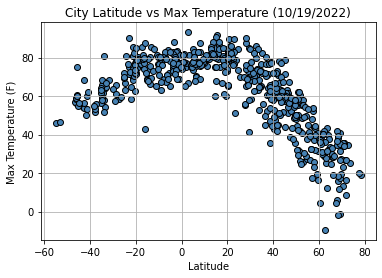

In [12]:
x_values = cities_data['Lat']
y_values = cities_data['Max Temp']
plt.scatter(x_values,y_values, c='steelblue', edgecolor='black')
plt.title("City Latitude vs Max Temperature (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("../output_data/Fig1_Lat_vs_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

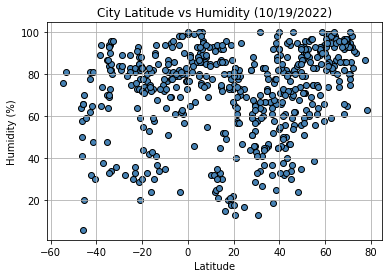

In [13]:
x_values = cities_data['Lat']
y_values = cities_data['Humidity']
plt.scatter(x_values,y_values, c='steelblue', edgecolor='black')
plt.title("City Latitude vs Humidity (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../output_data/Fig2_Lat_vs_Hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

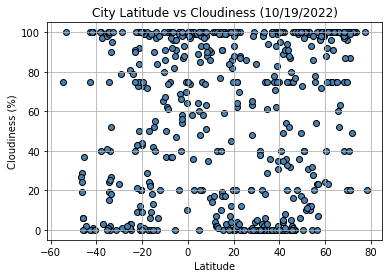

In [14]:
x_values = cities_data['Lat']
y_values = cities_data['Cloudiness']
plt.scatter(x_values,y_values, c='steelblue', edgecolor='black')
plt.title("City Latitude vs Cloudiness (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../output_data/Fig3_Lat_vs_Cld.png")
plt.show()

## Latitude vs. Wind Speed Plot

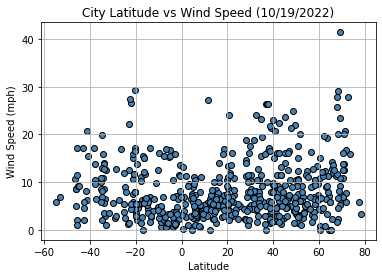

In [15]:
x_values = cities_data['Lat']
y_values = cities_data['Wind Speed']
plt.scatter(x_values,y_values, c='steelblue', edgecolor='black')
plt.title("City Latitude vs Wind Speed (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../output_data/Fig4_Lat_vs_Wnd.png")
plt.show()

## Linear Regression

In [16]:
north_hem = cities_data[cities_data['Lat'] > 0]
south_hem = cities_data[cities_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.85266584605559


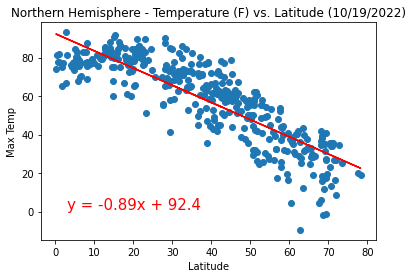

In [17]:
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(3,1),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print('The r-value is: ' + str(rvalue))
plt.savefig("../output_data/Fig5 Northern Hemisphere - Temperature (F) vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7032908495803767


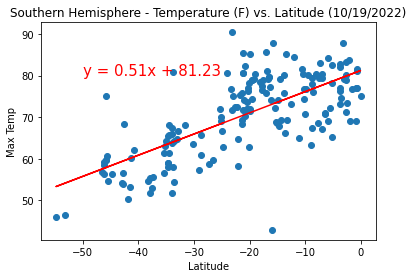

In [18]:
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print('The r-value is: ' + str(rvalue))
plt.savefig("../output_data/Fig6 Southern Hemisphere - Temperature (F) vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.23668437752563282


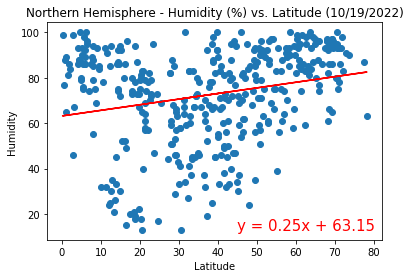

In [19]:
x_values = north_hem['Lat']
y_values = north_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,13),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print('The r-value is: ' + str(rvalue))
plt.savefig("../output_data/Fig7 Northern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19603590810685909


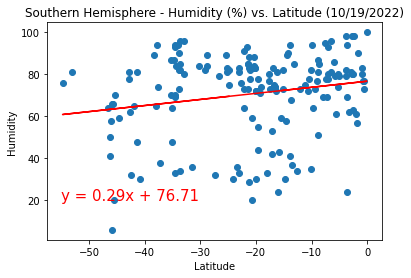

In [20]:
x_values = south_hem['Lat']
y_values = south_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print('The r-value is: ' + str(rvalue))
plt.savefig("../output_data/Fig8 Southern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1680556060754817


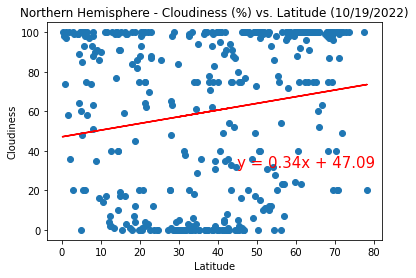

In [21]:
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,31.5),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print('The r-value is: ' + str(rvalue))
plt.savefig("../output_data/Fig9 Northern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.28531253700885756


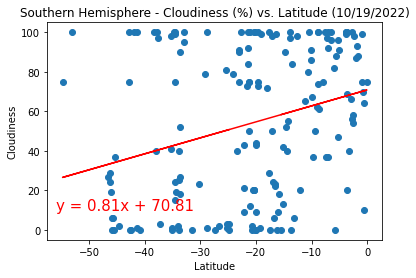

In [22]:
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-56,10),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print('The r-value is: ' + str(rvalue))
plt.savefig("../output_data/Fig10 Southern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.2344750448122322


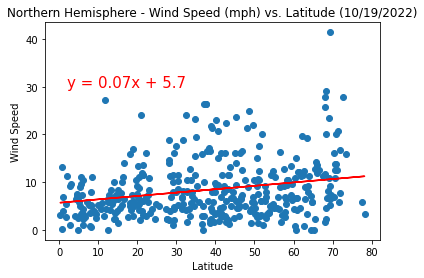

In [23]:
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(2,30),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print('The r-value is: ' + str(rvalue))
plt.savefig("../output_data/Fig11 Northern Hemisphere - Wind Speed (mph) vs. Latitudee.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.18906196045488532


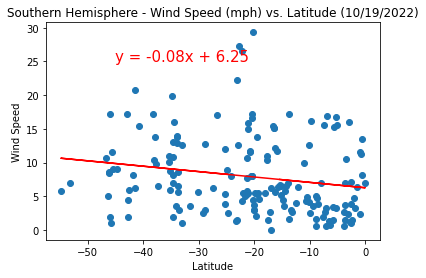

In [24]:
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-45,25),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude (10/19/2022)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print('The r-value is: ' + str(rvalue))
plt.savefig("../output_data/Fig12 Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")
plt.show()